In [2]:
import os

import pandas as pd
import numpy as np
import scipy.io

import time

from PIL import Image

import cv2
import matplotlib.pyplot as plt

from keras.models import Model, Sequential
from keras.layers import Input, Convolution2D, ZeroPadding2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from keras.preprocessing.image import load_img, save_img, img_to_array
from keras.applications.imagenet_utils import preprocess_input
from keras.preprocessing import image
#-----------------------

In [3]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [4]:
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(224, 224))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    
    #preprocess_input normalizes input in scale of [-1, +1]. You must apply same normalization in prediction.
    #Ref: https://github.com/keras-team/keras-applications/blob/master/keras_applications/imagenet_utils.py (Line 45)
    img = preprocess_input(img)
    return img

In [5]:
def loadVggFaceModel():
	model = Sequential()
	model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
	model.add(Convolution2D(64, (3, 3), activation='relu'))
	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(64, (3, 3), activation='relu'))
	model.add(MaxPooling2D((2,2), strides=(2,2)))

	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(128, (3, 3), activation='relu'))
	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(128, (3, 3), activation='relu'))
	model.add(MaxPooling2D((2,2), strides=(2,2)))

	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(256, (3, 3), activation='relu'))
	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(256, (3, 3), activation='relu'))
	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(256, (3, 3), activation='relu'))
	model.add(MaxPooling2D((2,2), strides=(2,2)))

	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(512, (3, 3), activation='relu'))
	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(512, (3, 3), activation='relu'))
	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(512, (3, 3), activation='relu'))
	model.add(MaxPooling2D((2,2), strides=(2,2)))

	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(512, (3, 3), activation='relu'))
	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(512, (3, 3), activation='relu'))
	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(512, (3, 3), activation='relu'))
	model.add(MaxPooling2D((2,2), strides=(2,2)))

	model.add(Convolution2D(4096, (7, 7), activation='relu'))
	model.add(Dropout(0.5))
	model.add(Convolution2D(4096, (1, 1), activation='relu'))
	model.add(Dropout(0.5))
	model.add(Convolution2D(2622, (1, 1)))
	model.add(Flatten())
	model.add(Activation('softmax'))
	
	#you can download pretrained weights from https://drive.google.com/file/d/1CPSeum3HpopfomUEK1gybeuIVoeJT_Eo/view?usp=sharing
	from keras.models import model_from_json
	model.load_weights('vgg_face_weights.h5')
	
	vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)
	
	return vgg_face_descriptor

model = loadVggFaceModel()
print("vgg face model loaded")

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\zero_padding2d.py:72: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


vgg face model loaded


In [6]:
def findFaceRepresentation(img):
    detected_face = img
    
    try: 
        detected_face = cv2.resize(detected_face, (224, 224))
        plt.imshow(cv2.cvtColor(detected_face, cv2.COLOR_BGR2RGB))
        
        #normalize detected face in scale of -1, +1

        img_pixels = image.img_to_array(detected_face)
        img_pixels = np.expand_dims(img_pixels, axis = 0)
        img_pixels /= 127.5
        img_pixels -= 1
        
        representation = model.predict(img_pixels)[0,:]
    except:
        representation = None
        
    return representation

def getImagePixels(image_path):
    return cv2.imread(image_path) 

In [7]:
df = pd.read_pickle("Maledataset.pkl")
df.head()

,Name,Path
0,BHUWANESWAR KUMAR,c:\Users\ASUS\OneDrive - K L University\Studen...
1,BHUWANESWAR KUMAR,c:\Users\ASUS\OneDrive - K L University\Studen...
2,BHUWANESWAR KUMAR,c:\Users\ASUS\OneDrive - K L University\Studen...
3,BHUWANESWAR KUMAR,c:\Users\ASUS\OneDrive - K L University\Studen...
4,BHUWANESWAR KUMAR,c:\Users\ASUS\OneDrive - K L University\Studen...


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

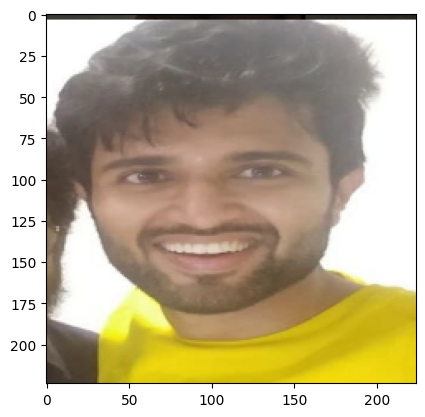

In [8]:
df['pixels'] = df['Path'].apply(getImagePixels)
df['face_vector_raw'] = df['pixels'].apply(findFaceRepresentation)
from pathlib import Path
df['Path']=df['Path'].apply(Path)
for i in df['Path']:
    print(type(i))

In [9]:
df.head()

,Name,Path,pixels,face_vector_raw
0,BHUWANESWAR KUMAR,c:\Users\ASUS\OneDrive - K L University\Studen...,"[[[255, 255, 255], [255, 255, 255], [255, 255,...","[0.017576763, 0.01099219, 0.028960848, 0.01590..."
1,BHUWANESWAR KUMAR,c:\Users\ASUS\OneDrive - K L University\Studen...,"[[[255, 255, 255], [255, 255, 255], [255, 255,...","[0.033503816, 0.038946614, -0.0076957634, 0.01..."
2,BHUWANESWAR KUMAR,c:\Users\ASUS\OneDrive - K L University\Studen...,"[[[91, 86, 85], [91, 86, 85], [91, 86, 85], [9...","[0.02286514, 0.005026661, 0.02606926, 0.014802..."
3,BHUWANESWAR KUMAR,c:\Users\ASUS\OneDrive - K L University\Studen...,"[[[129, 154, 170], [129, 154, 170], [129, 154,...","[0.026327651, 0.031867057, 0.022605704, 0.0025..."
4,BHUWANESWAR KUMAR,c:\Users\ASUS\OneDrive - K L University\Studen...,"[[[161, 190, 205], [162, 191, 206], [162, 191,...","[0.026812797, -0.002329783, 0.034596812, 0.009..."


In [10]:
df.to_pickle("Malepatterns.pkl")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

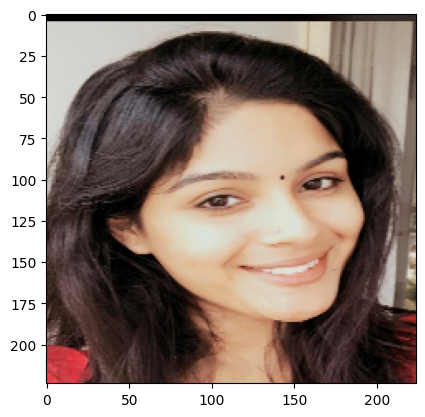

In [11]:
df2 = pd.read_pickle("Femaledataset.pkl")
df2['pixels'] = df2['Path'].apply(getImagePixels)
df2['face_vector_raw'] = df2['pixels'].apply(findFaceRepresentation)
from pathlib import Path
df2['Path']=df2['Path'].apply(Path)

In [12]:
df2.head()

,Name,Path,pixels,face_vector_raw
0,SMRITHI MANDHANA,c:\Users\ASUS\OneDrive - K L University\Studen...,"[[[229, 245, 255], [227, 243, 255], [225, 241,...","[0.030066377, 0.014467691, 0.018511541, 0.0213..."
1,SMRITHI MANDHANA,c:\Users\ASUS\OneDrive - K L University\Studen...,"[[[255, 255, 255], [255, 255, 255], [255, 255,...","[0.03895766, 0.019085914, 0.015509607, 0.02036..."
2,SMRITHI MANDHANA,c:\Users\ASUS\OneDrive - K L University\Studen...,"[[[118, 154, 184], [117, 147, 174], [101, 122,...","[0.0012497504, -0.011235083, 0.0120621165, 0.0..."
3,SMRITHI MANDHANA,c:\Users\ASUS\OneDrive - K L University\Studen...,"[[[113, 171, 213], [113, 171, 213], [113, 171,...","[-0.0014004238, 0.018335078, 0.0040921043, 0.0..."
4,SMRITHI MANDHANA,c:\Users\ASUS\OneDrive - K L University\Studen...,"[[[128, 141, 143], [139, 152, 154], [140, 152,...","[-0.00072236126, -0.017860215, 0.019344214, 0...."


In [13]:
df2.to_pickle("Femalepatterns.pkl")

In [14]:
model.save("VGGnet.h5")